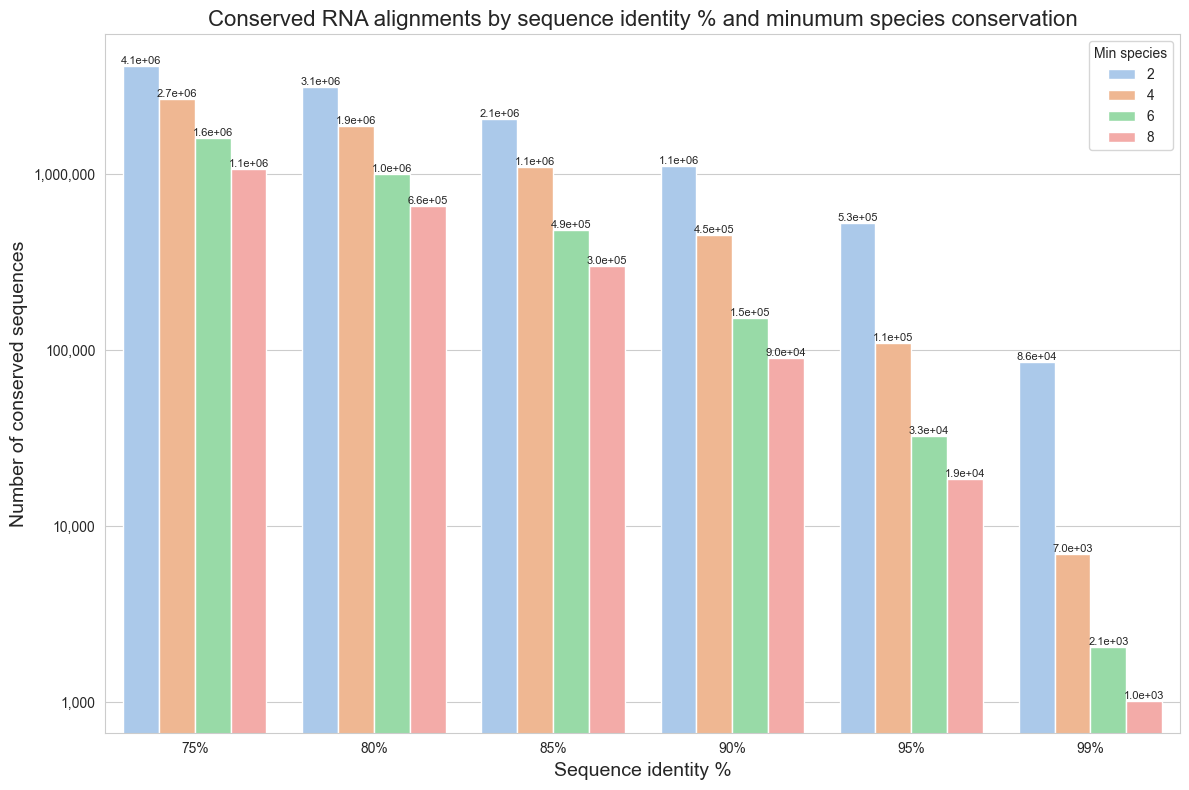

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

fasta_dir = "homology_clustered_datasets/alignment_only/conservation_0"

def count_fasta_entries(filepath):
    count = 0
    with open(filepath, 'r') as f:
        for line in f:
            if line.startswith('>'):
                count += 1
    return count

def parse_filename(filename):
    # could be threshold_0.75_1-sp_mmseqs_clustered.fasta
    match = re.match(r'run_(\d+\.\d+)_(\d+)-sp_querycons0.0_conserved_alignment_mmseqs_clustered.fasta', filename)
    if match:
        identity = f"{int(float(match.group(1))*100)}%"
        species = match.group(2)
        return identity, species
    return None, None

data = {
    "Identity": [],
    "SpeciesCount": [],
    "Sequences": []
}

for fname in os.listdir(fasta_dir):
    if fname.endswith('.fasta'):
        identity, species = parse_filename(fname)
        if identity and species:
            count = count_fasta_entries(os.path.join(fasta_dir, fname))
            data["Identity"].append(identity)
            data["SpeciesCount"].append(str(int(species)+1))
            data["Sequences"].append(count)

df = pd.DataFrame(data)
df["Sequences"] = pd.to_numeric(df["Sequences"])
identity_order = ["75%", "80%", "85%", "90%", "95%", "99%"]
species_order = ["2", "4", "6", "8"]
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(
    x="Identity", 
    y="Sequences", 
    hue="SpeciesCount", 
    data=df,
    palette="pastel",
    order=identity_order,
    hue_order=species_order
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1e', fontsize=8)
plt.title("Conserved RNA alignments by sequence identity % and minumum species conservation", fontsize=16)
plt.xlabel("Sequence identity %", fontsize=14)
plt.ylabel("Number of conserved sequences", fontsize=14)
plt.yscale("log")
plt.legend(title="Min species")
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig("conserved_rna_sequences.png", dpi=300)
plt.show()

In [ ]:
from Bio import Entrez

Entrez.email = "jacoblenzing@hotmail.com" 


def get_taxid(species_name):
    handle = Entrez.esearch(db="taxonomy", term=species_name)
    record = Entrez.read(handle)
    handle.close()
    if record["IdList"]:
        return record["IdList"][0]
    else:
        return None

if __name__ == "__main__":
    species_list = [
        "Abrothrix hirta",
        "Alouatta caraya",
        "Bos indicus",
        "Bos taurus",
        "Bubalus bubalis bubalis",
        "Bubalus bubalis",
        "Callithrix jacchus",
        "Capra hircus",
        "Castor canadensis",
        "Chinchilla lanigera",
        "Cricetulus griseus",
        "Cynopterus sphinx",
        "Delphinapterus leucas",
        "Dromiciops gliroides",
        "Eospalax fontanierii",
        "Equus caballus",
        "Eumetopias jubatus",
        "Fukomys darlingi",
        "Gorilla gorilla",
        "Heterocephalus glaber",
        "Hypsignathus monstrosus",
        "Lepus timidus",
        "Loxodonta africana",
        "Manis javanica",
        "Marmota monax",
        "Martes zibellina",
        "Meriones unguiculatus",
        "Mesocricetus auratus",
        "Mirounga leonina",
        "Monodelphis domestica",
        "Mus musculus",
        "Mus spretus",
        "Neogale vison",
        "Neophocaena asiaeorientalis",
        "Nyctereutes procyonoides",
        "Odocoileus virginianus",
        "Ornithorhynchus anatinus",
        "Oryctolagus cuniculus",
        "Otospermophilus beecheyi",
        "Perameles nasuta",
        "Peromyscus californicus",
        "Peromyscus leucopus",
        "Phodopus campbelli",
        "Phodopus sungorus",
        "Pongo pygmaeus",
        "Psammomys obesus",
        "Rhinolophus affinis",
        "Rhinolophus ferrumequinum",
        "Rousettus aegyptiacus",
        "Sarcophilus harrisii",
        "Sminthopsis crassicaudata",
        "Sus scrofa",
        "Tokudaia osimensis",
        "Trichosurus vulpecula",
        "Ursus maritimus"
    ]
    taxids = []
    for species in species_list:
        taxid = get_taxid(species)
        print(f"{species}: {taxid}")
        taxids.append(taxid if taxid else "")

    print(",".join(taxids))

In [ ]:
from ete3 import NCBITaxa

# load ncbi 
ncbi = NCBITaxa()

# list of taxids to create a tree
taxids = [1615796,9502,9915,9913,89462,9483,9925,51338,34839,10029,9400,9749,33562,146134,9796,34886,63616,9593,10181,448084,62621,9785,9974,9995,36722,10047,10036,9715,13616,10090,10096,452646,189058,34880,9874,9258,9986,34862,9344,42520,10041,47665,10044,9600,48139,59477,59479,9407,9305,9301,9823,73109,9337,29073]
tree = ncbi.get_topology(taxids)
print(tree.get_ascii(attributes=["sci_name"]))

# Save in Newick format for plotting in iTOL
tree.write(format=1, outfile="tree.nwk")


                                                                                           /-Fukomys darlingi
                                                                               /Bathyergidae
                                                                 /Hystricomorpha           \-Heterocephalus glaber
                                                                |             |
                                                                |              \-Chinchilla lanigera
                                                                |
                                                                |                          /-Psammomys obesus
                                                                |               /Gerbillinae
                                                                |              |           \-Meriones unguiculatus
                                                                |        /Muridae
                                  